In [1]:
%%capture
"""## Incremental Watermarking Test
### Evaluating Degradation with Multiple Watermarks
"""

# **Cell 1: Setup & Dependencies**

!{sys.executable} -m pip install torchaudio soundfile matplotlib
import torch
import torchaudio
import urllib
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Audio
from audioseal import AudioSeal


In [2]:

# **Cell 2: Download Sample Audio**
def download_sample_audio():
    # url = "https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav"
    url = "file:///C:/Users/x/Downloads/LJ025-0076.wav"
    with open("test.wav", "wb") as f:
        resp = urllib.request.urlopen(url)
        f.write(resp.read())
    
    wav, sample_rate = torchaudio.load("test.wav")
    return wav, sample_rate

audio, sr = download_sample_audio()


In [3]:
# **Cell 3: Helper Functions**
def plot_waveform_and_specgram(audio, sr, title="Audio Visualization"):
    fig, ax = plt.subplots(2, 1, figsize=(20, 6))    
    audio_np = audio.detach().cpu().numpy()  # Detach from computation graph
    ax[0].plot(audio_np.T)
    ax[0].set_title("Waveform - " + title)
    ax[1].specgram(audio_np.squeeze(), Fs=sr)
    ax[1].set_title("Spectrogram - " + title) 
    plt.show()


def snr(original, modified):
    noise = modified - original
    return 10 * torch.log10(torch.mean(original**2) / torch.mean(noise**2))

def ber(original_message, extracted_message):
    return (original_message != extracted_message).float().mean().item()

def play_audio(audio, sr):
    return Audio(audio.detach().cpu().numpy(), rate=sr)



In [4]:
# **Cell 4: Load Watermarking Model**
model = AudioSeal.load_generator("audioseal_wm_16bits")
detector = AudioSeal.load_detector("audioseal_detector_16bits")

audios = audio.unsqueeze(0)  # Add batch dimension


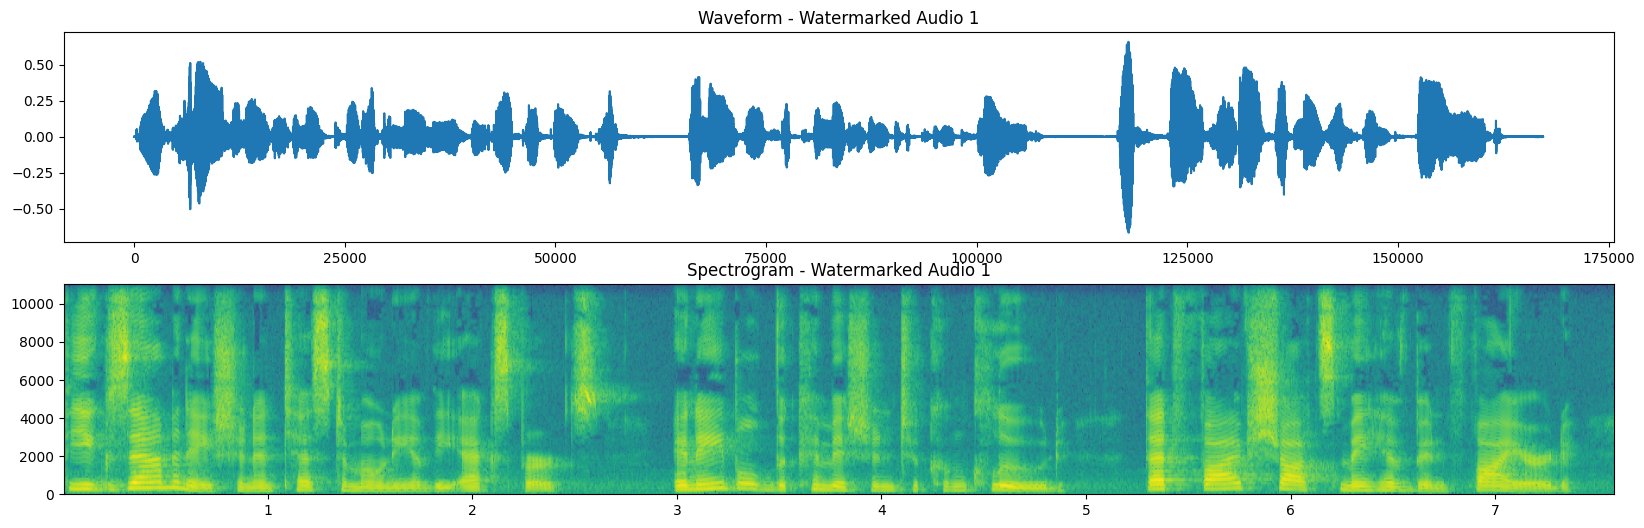

SNR after Watermark 1: 28.92 dB, BER: 0.0000, Detection Prob: 1.0000


In [5]:
# **Cell 5: Apply First Watermark**
message1 = torch.randint(0, 2, (1, 16), dtype=torch.int32)
watermarked1 = model(audios, sample_rate=sr, message=message1, alpha=1)

plot_waveform_and_specgram(watermarked1.squeeze(), sr, "Watermarked Audio 1")
display(play_audio(watermarked1.squeeze(), sr))

snr1 = snr(audios, watermarked1)
result1, extracted1 = detector.detect_watermark(watermarked1, sample_rate=sr)
ber1 = ber(message1, extracted1)
print(f"SNR after Watermark 1: {snr1:.2f} dB, BER: {ber1:.4f}, Detection Prob: {result1:.4f}")


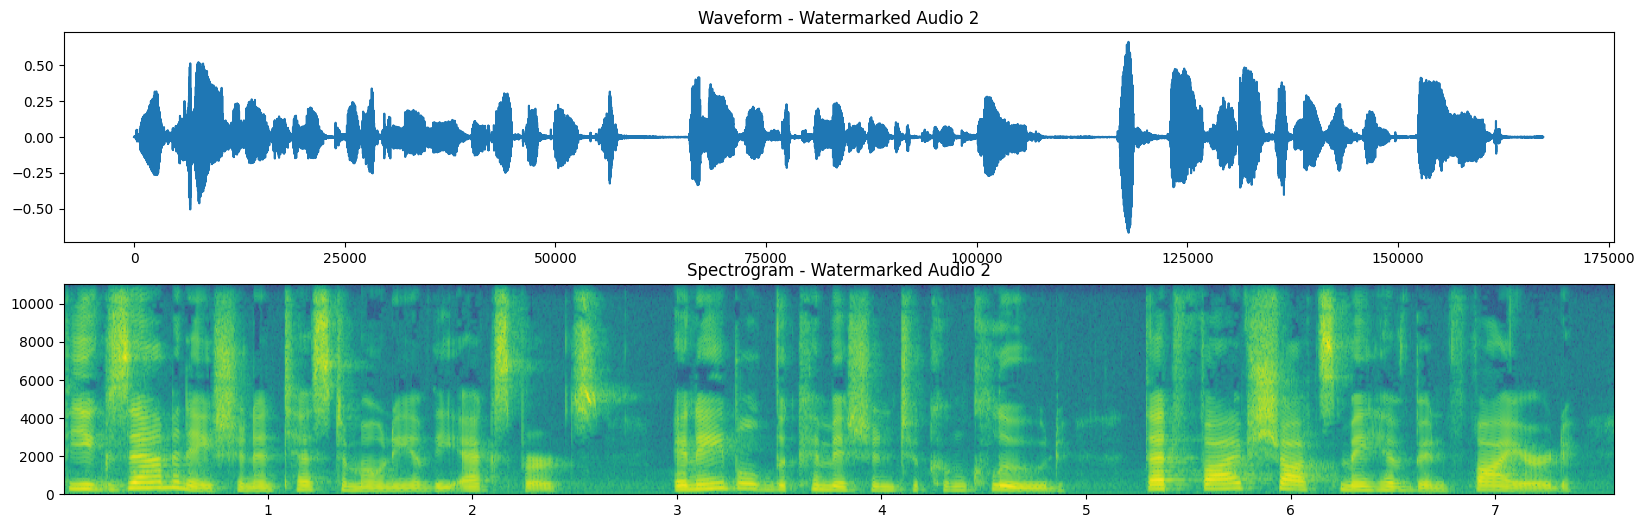

SNR after Watermark 2: 26.16 dB, BER (W2): 0.0000, Detection Prob (W2): 1.0000
BER (W1): 0.5000, Detection Prob (W1): 1.0000


In [6]:

# **Cell 6: Apply Second Watermark**
message2 = torch.randint(0, 2, (1, 16), dtype=torch.int32)
watermarked2 = model(watermarked1, sample_rate=sr, message=message2, alpha=1)

plot_waveform_and_specgram(watermarked2.squeeze(), sr, "Watermarked Audio 2")
display(play_audio(watermarked2.squeeze(), sr))

snr2 = snr(audios, watermarked2)
result2, extracted2 = detector.detect_watermark(watermarked2, sample_rate=sr)
ber2 = ber(message2, extracted2)

# Re-check Watermark 1
result1_new, extracted1_new = detector.detect_watermark(watermarked2, sample_rate=sr)
ber1_new = ber(message1, extracted1_new)
print(f"SNR after Watermark 2: {snr2:.2f} dB, BER (W2): {ber2:.4f}, Detection Prob (W2): {result2:.4f}")
print(f"BER (W1): {ber1_new:.4f}, Detection Prob (W1): {result1_new:.4f}")


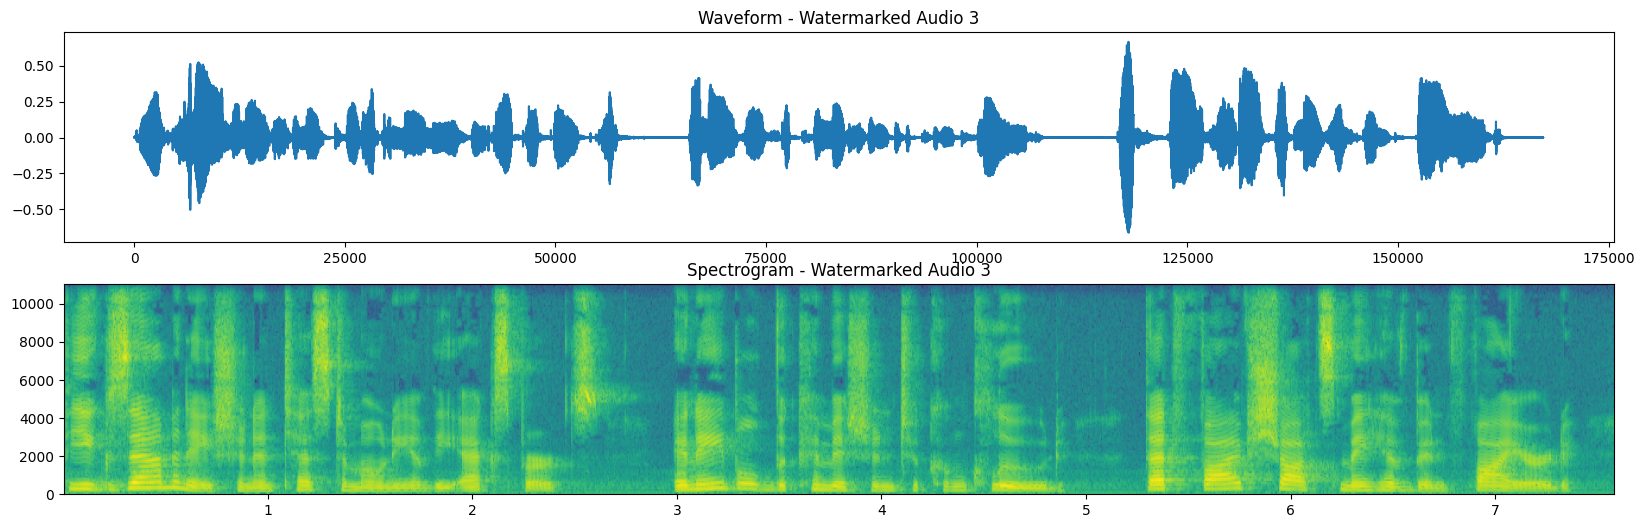

SNR after Watermark 3: 24.65 dB, BER (W3): 0.0000, Detection Prob (W3): 1.0000
BER (W1): 0.5625, Detection Prob (W1): 1.0000
BER (W2): 0.6875, Detection Prob (W2): 1.0000


In [7]:

# **Cell 7: Apply Third Watermark**
message3 = torch.randint(0, 2, (1, 16), dtype=torch.int32)
watermarked3 = model(watermarked2, sample_rate=sr, message=message3, alpha=1)

plot_waveform_and_specgram(watermarked3.squeeze(), sr, "Watermarked Audio 3")
display(play_audio(watermarked3.squeeze(), sr))

snr3 = snr(audios, watermarked3)
result3, extracted3 = detector.detect_watermark(watermarked3, sample_rate=sr)
ber3 = ber(message3, extracted3)

# Re-check W1 and W2
result1_newer, extracted1_newer = detector.detect_watermark(watermarked3, sample_rate=sr)
ber1_newer = ber(message1, extracted1_newer)
result2_new, extracted2_new = detector.detect_watermark(watermarked3, sample_rate=sr)
ber2_new = ber(message2, extracted2_new)

print(f"SNR after Watermark 3: {snr3:.2f} dB, BER (W3): {ber3:.4f}, Detection Prob (W3): {result3:.4f}")
print(f"BER (W1): {ber1_newer:.4f}, Detection Prob (W1): {result1_newer:.4f}")
print(f"BER (W2): {ber2_new:.4f}, Detection Prob (W2): {result2_new:.4f}")


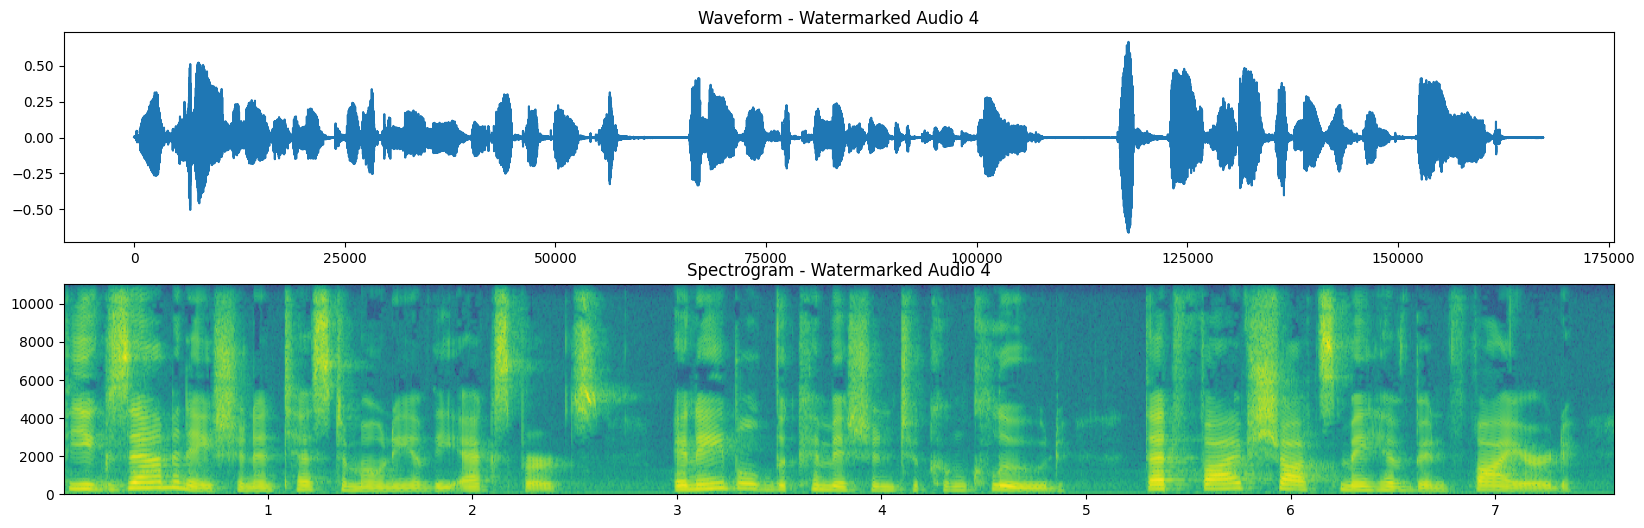

SNR after Watermark 4: 23.52 dB, BER (W4): 0.0000, Detection Prob (W4): 1.0000
BER (W1): 0.3750, Detection Prob (W1): 1.0000
BER (W2): 0.5000, Detection Prob (W2): 1.0000
BER (W3): 0.5625, Detection Prob (W3): 1.0000


In [8]:

# **Cell 8: Apply Fourth Watermark**
message4 = torch.randint(0, 2, (1, 16), dtype=torch.int32)
watermarked4 = model(watermarked3, sample_rate=sr, message=message4, alpha=1)

plot_waveform_and_specgram(watermarked4.squeeze(), sr, "Watermarked Audio 4")
display(play_audio(watermarked4.squeeze(), sr))

snr4 = snr(audios, watermarked4)
result4, extracted4 = detector.detect_watermark(watermarked4, sample_rate=sr)
ber4 = ber(message4, extracted4)

# Final checks on previous watermarks
result1_final, extracted1_final = detector.detect_watermark(watermarked4, sample_rate=sr)
ber1_final = ber(message1, extracted1_final)
result2_final, extracted2_final = detector.detect_watermark(watermarked4, sample_rate=sr)
ber2_final = ber(message2, extracted2_final)
result3_final, extracted3_final = detector.detect_watermark(watermarked4, sample_rate=sr)
ber3_final = ber(message3, extracted3_final)

print(f"SNR after Watermark 4: {snr4:.2f} dB, BER (W4): {ber4:.4f}, Detection Prob (W4): {result4:.4f}")
print(f"BER (W1): {ber1_final:.4f}, Detection Prob (W1): {result1_final:.4f}")
print(f"BER (W2): {ber2_final:.4f}, Detection Prob (W2): {result2_final:.4f}")
print(f"BER (W3): {ber3_final:.4f}, Detection Prob (W3): {result3_final:.4f}")
